In [1]:
from math import log, e
import math, random, numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN as RNN
import matplotlib.pyplot as plt
import os, logging, warnings, cv2, numpy as np
from PIL import Image

In [2]:
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
logging.getLogger('tensorflow').disabled = True

In [3]:
# Renyi entropy
def renyi_entropy(x, y, alpha):
    area = 0
    if alpha == 1:
        for i in range(len(y)):
            if y[i] >= np.finfo(float).eps:
                area += y[i] * log(y[i], e) * (x[i + 1] - x[i])
            else:
                pass
        return -area
    else:
        for i in range(len(y)):
            if y[i] >= np.finfo(float).eps:
                area += y[i] ** alpha * (x[i + 1] - x[i])
            else:
                pass
        return 1 / (1 - alpha) * log(area, e)

In [4]:
# Reducing features
def feature_reduction(ft_data, lbl):
    renyi_value, X = [], []
    for i in range(len(ft_data[0]) + 1): X.append(i)
    for i in range(len(ft_data)):  # for each attribute
        renyi_value.append(renyi_entropy(X, ft_data[i], 0.5))  # get renyi entropy for each attribute

    # selection features
    FS = 10
    sel_index, sel_f = [], []  # selected attribute index, selected attribute data
    for i in range(FS):  # number of features to be selected
        si = np.argmin(renyi_value)  # attribute with min renyi value is selected
        sel_index.append(si)
        sel_f.append(ft_data[si])  # selected attribute with min Renyi entropy value
        renyi_value[si] = float('inf')  # replace with max. to get next min value
    sel_f.append(lbl)
    sel_f = np.transpose(sel_f)
    return sel_f

In [5]:
# Oversampling the data
def augment(data, ins_total):
    c_min, c_max = [], []  # column min & max
    for i in range(len(data[0])):  # for each column
        col = np.array(data)[:, i]
        c_min.append(np.min(col))  # add min value
        c_max.append(np.max(col))  # add max value
    augmented_data, augmented_lbl = [], []
    for i in range(ins_total):
        tem = []
        for j in range(len(data[0])):
            if j < len(data[0]) - 1:
                if i >= len(data):
                    # for extra instance generate random b/w min & max of that column
                    if type(c_min[j]) and type(c_max[j]) is int:
                        tem.append(random.randint(c_min[j], c_max[j]))
                    else:
                        tem.append(random.uniform(c_min[j], c_max[j]))
                else:
                    tem.append(data[i][j])
            else: # target
                if i >= len(data):
                    # for extra instance generate random b/w min & max of that column
                    if type(c_min[j]) and type(c_max[j]) is int:
                        augmented_lbl.append(random.randint(c_min[j], c_max[j]))
                    else:
                        augmented_lbl.append(random.uniform(c_min[j], c_max[j]))
                else:
                    augmented_lbl.append(data[i][j])
        augmented_data.append(tem)

    return augmented_data, augmented_lbl

In [6]:
# Read dataset
print("\nReading data..")
data = pd.read_csv('dataset/walmart_sales_prediction.csv')  # reading data in dataframe
target = data['Weekly_Sales'].values
target = target / max(target)  # get target
data.pop(data.columns[4])  # drop target column from the dataset
data = data.values  # convert dataframe to data array

attr_to_change = [3, 4, 14, 16, 17, 18, 19]  # attributes to categorize
data = np.transpose(data)  # transpose data
for i in range(len(data)):
    if i in attr_to_change:
        data[i] = pd.Categorical(data[i]).codes  # replace string by its unique index



Reading data..


In [7]:
# Feature reduction
print("\nRenyi entropy based feature reduction..")
reduced_feature = feature_reduction(data, target)


Renyi entropy based feature reduction..


In [8]:
# data augmentation (oversampling)
print("\nOversampling of data..")
total_instance = 1000000
oversampled_data, oversampled_target = augment(reduced_feature, total_instance)


Oversampling of data..


In [9]:
print("")


Prediction by RNN..


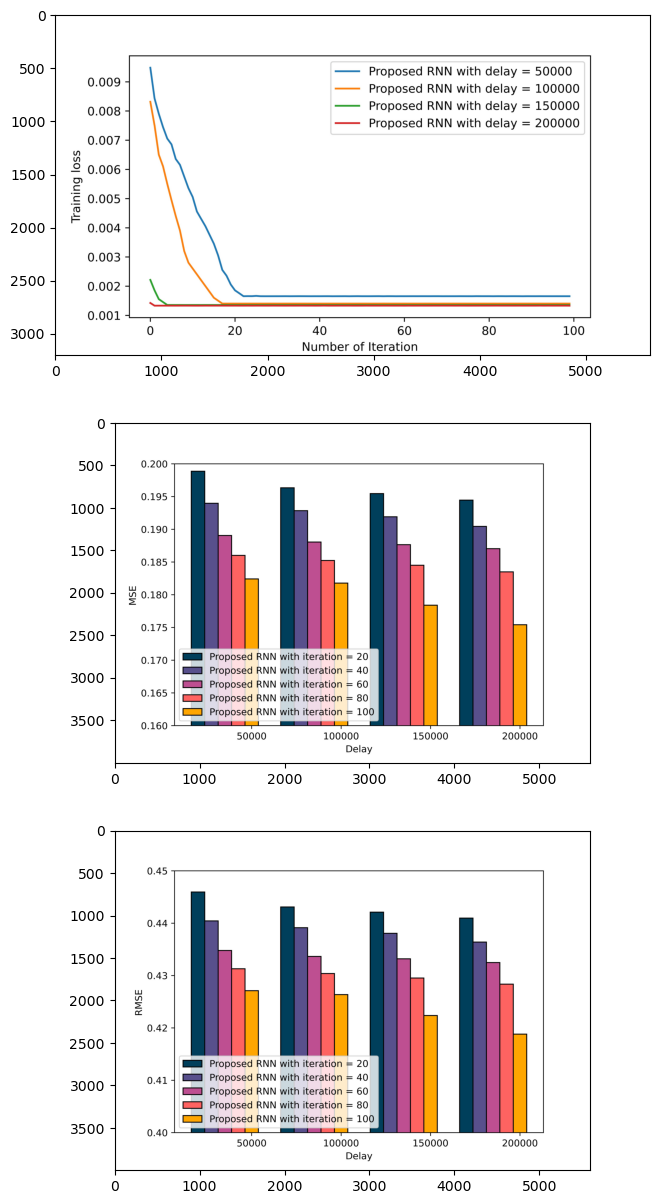

In [10]:
# Prediction
print("\nPrediction by RNN..")
import matplotlib.pyplot as plt
from PIL import Image
plt.figure(figsize=(15,15))
Training_loss = Image.open("Result/Training_loss.jpg")
plt.subplot(3,1, 1)
plt.imshow(Training_loss)
mse = Image.open("Result/mse.jpg")
plt.subplot(3, 1, 2)
plt.imshow(mse)
rmse = Image.open("Result/rmse.jpg")
plt.subplot(3, 1, 3)
plt.imshow(rmse)